In [1]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/SchwiftyNotebook_convolution_model")' SchwiftyNotebook_convolution_model

Installing packages:
	.package(path: "/home/ubuntu/workspace/fast-ai-swift/SchwiftyNotebook_convolution_model")
		SchwiftyNotebook_convolution_model
With SwiftPM flags: []
Working in: /tmp/tmppvykw98x/swift-install
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version information available (required by /home/ubuntu/swift/usr/bin/swift)
/home/ubuntu/swift/usr/bin/swift: /home/ubuntu/anaconda3/envs/swift-env/lib/libuuid.so.1: no version info

In [2]:
//export
import Path
import TensorFlow
import SchwiftyNotebook_convolution_model

In [3]:
import Python
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

public let plotter = Python.import("matplotlib.pyplot")

# Data Setup

In [4]:
let n = 100
let inputPoints = TensorFloat(randomNormal: [100, 1])
let A = inputPoints.concatenated(with: TensorFloat(ones: inputPoints.shape), alongAxis: 1)
A.shape

▿ [100, 2]
  ▿ dimensions : 2 elements
    - 0 : 100
    - 1 : 2


In [5]:
let yValidationPoints = matmul(A, TensorFloat([-2, 7]).expandingShape(at: 1)) + 
                (TensorFloat(randomNormal: inputPoints.shape, seed: (69, 420)) * 2.5)
yValidationPoints.shape

▿ [100, 1]
  ▿ dimensions : 2 elements
    - 0 : 100
    - 1 : 1


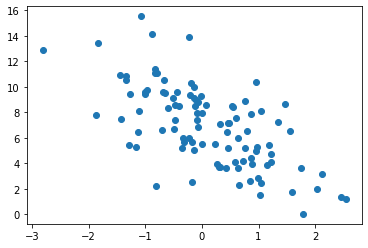

None


In [6]:
plotter.scatter(x: A.slice(lowerBounds: [0, 0], upperBounds:[A.shape[0], 1] ).makeNumpyArray(), 
                y: yValidationPoints.makeNumpyArray())
plotter.show()

# Model Creation

In [7]:
@differentiable
func squareBoi(inputTensor: TensorFloat) -> TensorFloat {
    return inputTensor * inputTensor
}

let (squared, squareGradientChain) = valueWithPullback(at: TensorFloat([2, 3]), in: squareBoi)
print(squared)
print(type(of: squareGradientChain))

[4.0, 9.0]
(Tensor<Float>) -> Tensor<Float>


In [8]:
//tail recursion?
func loopyBoi(x: Int) {
    guard x > 0 else { return }
    print("Loopy Boi \(x)")
    return loopyBoi(x: x - 1)
}

loopyBoi(x: 5)

Loopy Boi 5
Loopy Boi 4
Loopy Boi 3
Loopy Boi 2
Loopy Boi 1


In [9]:
let tensorBoi = TensorFloat([1, 2, 3]).expandingShape(at: 1)
let weightParameter = TensorFloat(kaimingUniform: TensorShape([2, 1]))
let biasParamer = TensorFloat(zeros: [1])

In [32]:
// @differentiable
@differentiable(wrt: (weightParameter, biasParameter), vjp: womboComboGradient)
func womboCombinator(inputTensor: TensorFloat, weightParameter: TensorFloat, biasParameter: TensorFloat) -> TensorFloat {
    return matmul(inputTensor, weightParameter) + biasParameter
}

func womboComboGradient(inputParameter: TensorFloat, 
                        weightParameter: TensorFloat, 
                        biasParameter: TensorFloat) -> (value: TensorFloat, 
                                                        pullback: (TensorFloat) -> 
                                                        (TensorFloat, TensorFloat)) {
    //M x N * N x O = M x O
    return (value: weightParameter, pullback: { ddx in (
        matmul(inputParameter.transposed(), ddx),
        ddx.unbroadcasted(to: biasParamer.shape)
    ) })
}

In [33]:
let (womboCombo, womboComboGradientChain) = valueWithPullback(at: A, 
                                                              weightParameter, 
                                                              biasParamer, 
                                                              in: womboCombinator)

: 

In [29]:
print(type(of: womboComboGradientChain))

(Tensor<Float>) -> (Tensor<Float>, Tensor<Float>, Tensor<Float>)
